In [62]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
ride=pd.read_csv('RideData.csv')

In [64]:
ride.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [65]:
ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.2+ MB


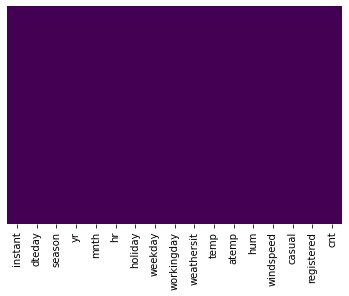

In [66]:
sn.heatmap(ride.isnull(),yticklabels=False,cbar=False,cmap='viridis')

using this visualization we can say that there is no null value present in the dataset

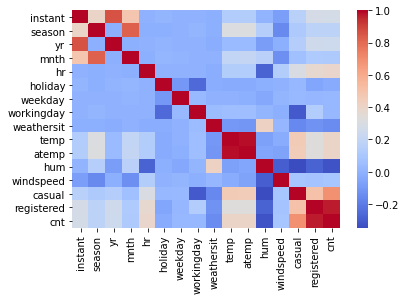

In [67]:
sn.heatmap(ride.corr(),cmap='coolwarm')

## Some Data Analysis


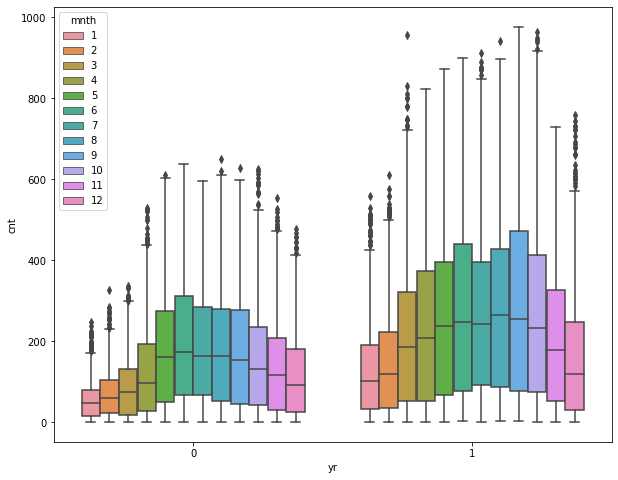

In [68]:
plt.figure(figsize=(10,8))
sn.boxplot(x='yr',y='cnt',data=ride,hue='mnth')

bikes count is higher in 2011 year and in August month

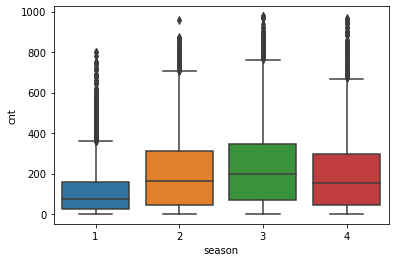

In [69]:
sn.boxplot(x='season',y='cnt',data=ride)

using the above visualization we can say that the avg of bikes count is highest in fall season


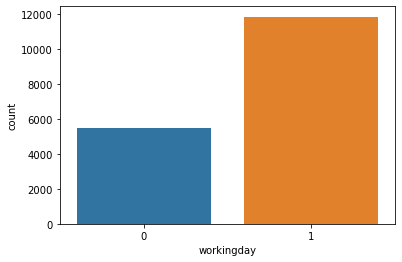

In [70]:
sn.countplot(ride['workingday'])

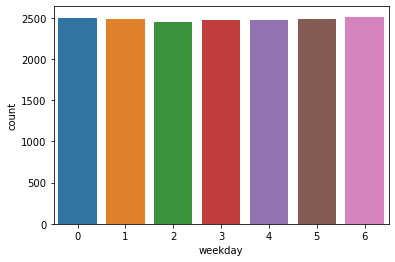

In [71]:
sn.countplot(ride['weekday'])

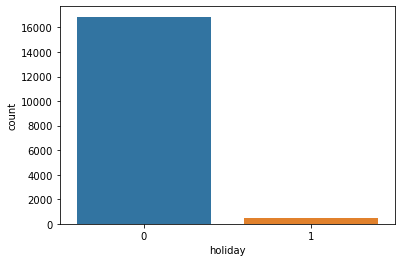

In [72]:
sn.countplot(ride['holiday'])

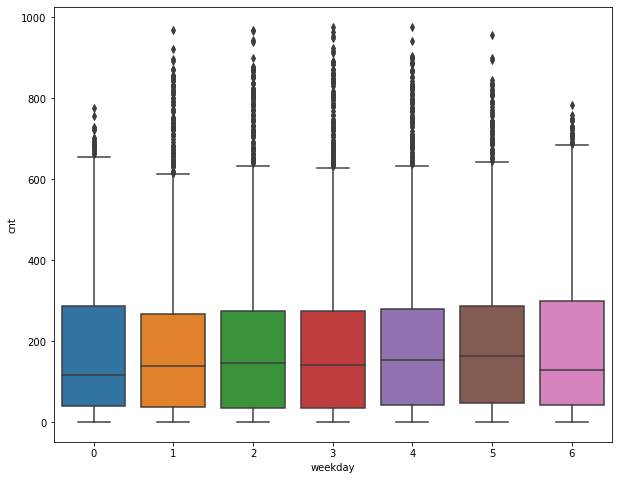

In [73]:
plt.figure(figsize=(10,8))
sn.boxplot(x='weekday',y='cnt',data=ride)

using the above visulaziation we can say that the count of bikes are higher during saturday and tuesday(2,5)

In [74]:
ride.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [75]:
x=ride[['season','yr','mnth','holiday','weekday','workingday','casual','registered']]

In [76]:
y=ride['cnt']

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
lg=LinearRegression()

In [81]:
lg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
prd=lg.predict(x_test)

## Metrics

In [83]:
from sklearn import metrics

In [84]:
metrics.mean_absolute_error(y_test,prd)

7.254489384440816e-13

In [85]:
metrics.mean_squared_error(y_test,prd)

7.767257155836424e-25

In [86]:
np.sqrt(metrics.mean_squared_error(y_test,prd))

8.813204386508022e-13

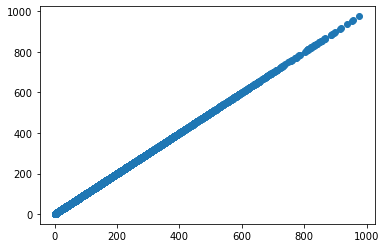

In [87]:
plt.scatter(y_test,prd)

In [88]:
metrics.r2_score(prd,y_test)

1.0

In [89]:
lg.score(x_train,y_train)

1.0

In [90]:
lg.score(x_test,y_test)

1.0